In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing

In [23]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
application_df = pd.read_csv("/content/drive/MyDrive/deep-learning-challenge/Resources/charity_data.csv")

In [24]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis='columns')

In [25]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [26]:
# Create a list of application types to be replaced
application_types_to_replace = ['T13','T12', 'T2', 'T14', 'T25', 'T15', 'T29', 'T17','T9']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [27]:
# Create a list of classifications to be replaced
classifications_to_replace = ['C7000','C1700','C4000',
                              'C5000','C1270',
                              'C2700','C2800','C7100',
                              'C1300','C1280','C1230',
                              'C1400','C7200','C2300',
                              'C1240','C8000','C7120',
                              'C1500','C1800','C6000',
                              'C1250','C8200','C1238',
                              'C1278','C1235','C1237',
                              'C7210','C2400','C1720',
                              'C4100','C1257','C1600',
                              'C1260','C2710','C0',
                              'C3200','C1234','C1246',
                              'C1267','C1256','C4120',
                              'C8210','C2561','C4500',
                              'C2150','C2570','C1820',
                              'C6100','C1248','C2600',
                              'C1370','C5200','C4200',
                              'C2190','C1236','C2500',
                              'C1580','C3700','C1570',
                              'C1283','C2380','C1732',
                              'C1728','C2170','C1245',
                              'C1900'
                              ]

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [28]:
# Look to see if can bin `INCOME_AMT` into fewer groups to limit features
application_df['INCOME_AMT'].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

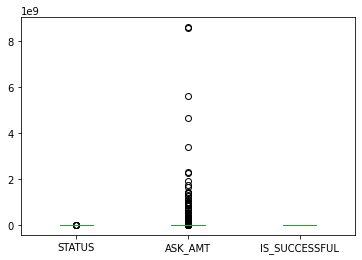

In [29]:
# Look to see if any outliers
application_df.plot.box(['ASK_AMT'])

In [30]:
# See distribution for `STATUS` and `SPECIAL_CONSIDERATIONS`
application_df['STATUS'].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [31]:
# Based on the above, groups wtih status 0 are outliers. Drop these rows and remove this column
application_df = application_df.drop(application_df[application_df.STATUS ==0].index)
application_df = application_df.drop(['STATUS'], axis='columns')
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS', 'ASK_AMT',
       'IS_SUCCESSFUL'],
      dtype='object')

In [32]:
# See distribution for `SPECIAL_CONSIDERATIONS`
application_df['SPECIAL_CONSIDERATIONS'].value_counts()

N    34268
Y       26
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [33]:
# Based on the above, groups wtih special considerations Y are outliers. Drop these rows and remove this column
application_df = application_df.drop(application_df[application_df.SPECIAL_CONSIDERATIONS =='Y'].index)
application_df = application_df.drop(['SPECIAL_CONSIDERATIONS'], axis='columns')
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [34]:
# Determine if Dataset is balanced.
application_df['IS_SUCCESSFUL'].value_counts()

1    18242
0    16026
Name: IS_SUCCESSFUL, dtype: int64

Based on the above, the dataset is fairly balanced.

In [35]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)

In [36]:
# Split our preprocessed data into our features and target arrays
# Features array
X = application_df.drop(['IS_SUCCESSFUL'], axis='columns')

# Target array
y = application_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [37]:
X_train.shape

(25701, 40)

In [38]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate the Model

## Baseline with new data cleaning

In [39]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Initialize model
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=40))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu"))

# Second hidden layer
# nn.add(tf.keras.layers.Dense(units=40, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3280      
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 9,841
Trainable params: 9,841
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5671 - accuracy: 0.7223
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5544 - accuracy: 0.7318
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5526 - accuracy: 0.7322
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5484 - accuracy: 0.7335
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5477 - accuracy: 0.7335
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5470 - accuracy: 0.7336
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5458 - accuracy: 0.7322
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5453 - accuracy: 0.7326
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5442 - accuracy: 0.7357
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5446 - accura

In [42]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5724 - accuracy: 0.7231 - 372ms/epoch - 1ms/step
Loss: 0.5723698735237122, Accuracy: 0.7231236100196838


Model is overfitt and since dataset is more or less balanced will reduce epochs. Should modify hidden layers and number of nodes to try and improve accuracy

## V2 - Modify 

In [43]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Initialize model
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=40))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                1230      
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 20)                620       
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,801
Trainable params: 2,801
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [45]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5741 - accuracy: 0.7152
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5531 - accuracy: 0.7305
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5501 - accuracy: 0.7316
Epoch 4/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5482 - accuracy: 0.7331
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5466 - accuracy: 0.7316
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5463 - accuracy: 0.7334
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5451 - accuracy: 0.7349
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5442 - accuracy: 0.7352
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5436 - accuracy: 0.7355
Epoch 10/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5438 - accuracy: 0.7358

In [46]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5644 - accuracy: 0.7220 - 338ms/epoch - 1ms/step
Loss: 0.564437985420227, Accuracy: 0.7219563722610474


The model is more balanced but accuracy is still low. Will try adding an additional hidden layer and modifying activation function

## V3 

In [47]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Initialize model
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=40))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="elu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="elu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="softmax"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 30)                1230      
                                                                 
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 dense_9 (Dense)             (None, 20)                620       
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [49]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5743 - accuracy: 0.5308
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.5308
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5515 - accuracy: 0.5308
Epoch 4/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5495 - accuracy: 0.5308
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5486 - accuracy: 0.5308
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5479 - accuracy: 0.5308
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5468 - accuracy: 0.5308
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5463 - accuracy: 0.5308
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5454 - accuracy: 0.5308
Epoch 10/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5451 - accuracy: 0.5308

In [50]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5606 - accuracy: 0.5368 - 370ms/epoch - 1ms/step
Loss: 0.5606152415275574, Accuracy: 0.5368273854255676


Well that didn't work... Keep the layers change back the activation functions

## V4

In [51]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Initialize model
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=40))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=60, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=40, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 80)                3280      
                                                                 
 dense_13 (Dense)            (None, 60)                4860      
                                                                 
 dense_14 (Dense)            (None, 40)                2440      
                                                                 
 dense_15 (Dense)            (None, 20)                820       
                                                                 
 dense_16 (Dense)            (None, 10)                210       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 11,621
Trainable params: 11,621
Non-trai

In [52]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [53]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5671 - accuracy: 0.7244
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5527 - accuracy: 0.7315
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5495 - accuracy: 0.7317
Epoch 4/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5481 - accuracy: 0.7329
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5481 - accuracy: 0.7338
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5469 - accuracy: 0.7350
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5458 - accuracy: 0.7346
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5456 - accuracy: 0.7349
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5448 - accuracy: 0.7370
Epoch 10/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5437 - accuracy: 0.7378

In [54]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5643 - accuracy: 0.7248 - 375ms/epoch - 1ms/step
Loss: 0.5643035173416138, Accuracy: 0.7247577905654907


Best yet - will add Tanh activation to another hidden layer

## V5

In [55]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Initialize model
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=40))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=60, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=40, activation="gelu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 80)                3280      
                                                                 
 dense_19 (Dense)            (None, 60)                4860      
                                                                 
 dense_20 (Dense)            (None, 40)                2440      
                                                                 
 dense_21 (Dense)            (None, 20)                820       
                                                                 
 dense_22 (Dense)            (None, 10)                210       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 11,621
Trainable params: 11,621
Non-trai

In [56]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [57]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5644 - accuracy: 0.7241
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5535 - accuracy: 0.7318
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5500 - accuracy: 0.7321
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5482 - accuracy: 0.7324
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5482 - accuracy: 0.7330
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5469 - accuracy: 0.7343
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5460 - accuracy: 0.7355
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5453 - accuracy: 0.7355
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5443 - accuracy: 0.7360
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5439 - accuracy: 0.7363

In [58]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5619 - accuracy: 0.7249 - 394ms/epoch - 1ms/step
Loss: 0.5618962645530701, Accuracy: 0.7248744964599609


## V6

In [59]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Initialize model
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=40))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=60, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=40, activation="gelu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="gelu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 80)                3280      
                                                                 
 dense_25 (Dense)            (None, 60)                4860      
                                                                 
 dense_26 (Dense)            (None, 40)                2440      
                                                                 
 dense_27 (Dense)            (None, 20)                820       
                                                                 
 dense_28 (Dense)            (None, 10)                210       
                                                                 
 dense_29 (Dense)            (None, 5)                 55        
                                                                 
 dense_30 (Dense)            (None, 1)                

In [60]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [61]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5673 - accuracy: 0.7201
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5521 - accuracy: 0.7306
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5505 - accuracy: 0.7315
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5489 - accuracy: 0.7332
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5473 - accuracy: 0.7349
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5462 - accuracy: 0.7351
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5455 - accuracy: 0.7346
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5449 - accuracy: 0.7357
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5440 - accuracy: 0.7358
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5439 - accura

In [62]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5718 - accuracy: 0.7239 - 398ms/epoch - 1ms/step
Loss: 0.5717784762382507, Accuracy: 0.7239407300949097


## V7

In [64]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Initialize model
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=200, activation="relu", input_dim=40))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=200, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=100, activation="gelu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=100, activation="gelu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 200)               8200      
                                                                 
 dense_32 (Dense)            (None, 200)               40200     
                                                                 
 dense_33 (Dense)            (None, 100)               20100     
                                                                 
 dense_34 (Dense)            (None, 100)               10100     
                                                                 
 dense_35 (Dense)            (None, 80)                8080      
                                                                 
 dense_36 (Dense)            (None, 50)                4050      
                                                                 
 dense_37 (Dense)            (None, 1)                

In [65]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [66]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5672 - accuracy: 0.7228
Epoch 2/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5565 - accuracy: 0.7288
Epoch 3/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5527 - accuracy: 0.7307
Epoch 4/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5508 - accuracy: 0.7322
Epoch 5/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5503 - accuracy: 0.7325
Epoch 6/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5483 - accuracy: 0.7325
Epoch 7/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5480 - accuracy: 0.7341
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5468 - accuracy: 0.7327
Epoch 9/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5466 - accuracy: 0.7337
Epoch 10/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5461 - accuracy: 0.7335

In [67]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5641 - accuracy: 0.7270 - 464ms/epoch - 2ms/step
Loss: 0.5640567541122437, Accuracy: 0.7269756197929382


This one is the best - Will save to HDF5

## Export Model

In [63]:
# Export our model to HDF5 file
nn.save('/content/drive/MyDrive/deep-learning-challenge/AlphabetSoupCharity_Optimization.h5')

# Report on the Neural Network Model

## Overview

The purpose of this analysis is to present an overview of the results of the foundation funding application binary classifier built for Alphabet Soup.

## Results

### Data Preprocessing
- Target Variables: A successful or unsuccessful funded project
- Features for the model:
    - APPLICATION TYPE
    - AFFILIATION
    - CLASSIFICATION OF APPLICANT
    - USE CASE FOR FUNDS
    - ORGANIZATION
    - INCOME AMT
    - ASK_AMT 

- Variables that are neither targets nor features and should be removed
    - EIN, 
    - NAME, 
    - STATUS,
    - SPECIAL_CONSIDERATIONS.

### Compiling, Training, and Evaluating the Model
- How many neurons, layers and activation functions did you select for model, and why
    - Input layer had 200 neurons, with the relu activation as it's the best activation function to initialize a network with
    - the output layer had 1 neuron and a sigmoid activation as it's the best to end on for a binary classifier.
    - There were 5 hidden layers with 200, 100, 100, 80, and 50 neurons (in that order), and with activation functions tanh, gelu, gelu, relu, and relu.
        for these I continued to add layers and neurons in the hope that a more layers and neurons would help to handle the level of complexity of the problem and so that my total layers (7) would match the total number of features.

- I was unable to achieve the target model performance of 75%, achieving instead a max test score of 72.4% accuracy - however this was NOT from lack of trying.
- In order to try and increase model performance I did a number of things:
    - First I, removed some of the features that were very unbalanced by dropping the rows with the lowest occurences and removing the column entierly.
    - then I, added more layers and varied activation functions
    - And I also tried adding more neurons per layer.

## Summary

Overall the model performed at 72.4% testing accuracy. Should I continue to try and optimize classification accuracy I would consider trying some Ensemble algorithms like Random Forest or Extra Trees and see if accuracy would improve. I would also try and create a more balanced dataset by duplicating rows at random in the under represented category to provide less bias. 

Next, I would re-bin the ask amount into 3 bins and remove some of the outliers as that would be contributing to lowered model prediction performance.